In [1]:
import btrack 
import matplotlib.pyplot as plt 
import numpy as np

from pathlib import Path 
from sklearn.preprocessing import normalize
from tmap import TemporalMAP
from tmap.utils import plot_embeddings

### load some tracking data

In [2]:
PATH = Path("./data/")
FILE = PATH / "stardist_tracks.h5"

In [3]:
with btrack.io.HDF5FileHandler(FILE, "r") as hdf:
    tracks = hdf.tracks

[INFO][2024/11/21 10:06:59 AM] Opening HDF file: data/stardist_tracks.h5...
[INFO][2024/11/21 10:06:59 AM] Loading tracks/obj_type_1
[INFO][2024/11/21 10:06:59 AM] Loading LBEP/obj_type_1
[INFO][2024/11/21 10:06:59 AM] Loading objects/obj_type_1 (401799, 5) (401799 filtered: None)
[INFO][2024/11/21 10:07:01 AM] Closing HDF file: data/stardist_tracks.h5


In [4]:
def filter_track(track):
    mask = np.asarray(track.dummy)
    features = track["stardist"]
    return normalize(features[~mask, ...], axis=1)

In [5]:
sequences = [filter_track(t)[:50, ...] for t in tracks]

### iterate over the number of neighbors and plot the tmap embeddings for the trajectories

Embedding: 100%|██████████| 200/200 [00:01<00:00, 128.20it/s]


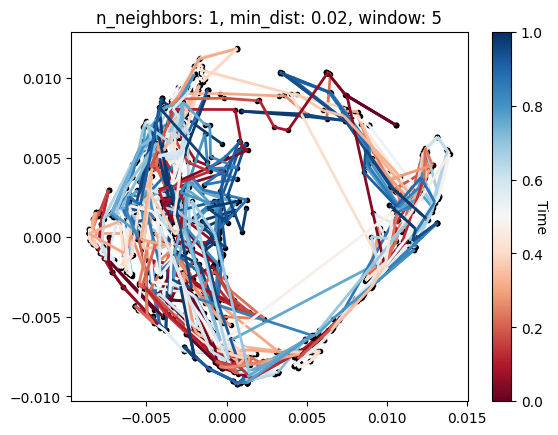

Embedding: 100%|██████████| 200/200 [00:00<00:00, 1165.98it/s]


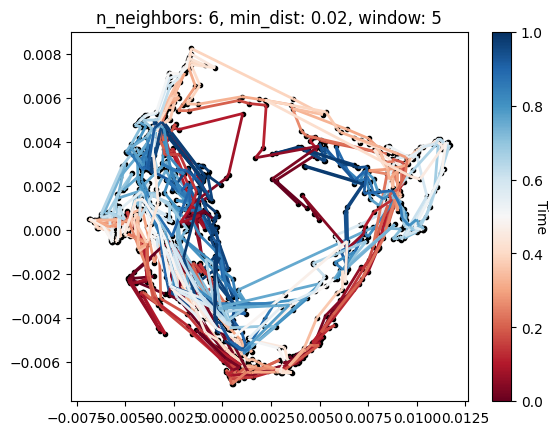

Embedding: 100%|██████████| 200/200 [00:00<00:00, 1267.40it/s]


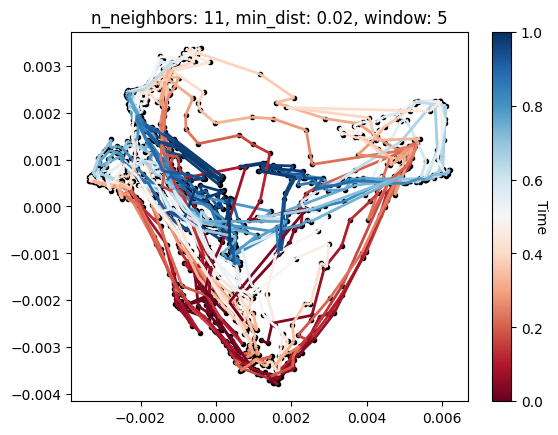

Embedding: 100%|██████████| 200/200 [00:00<00:00, 1074.29it/s]


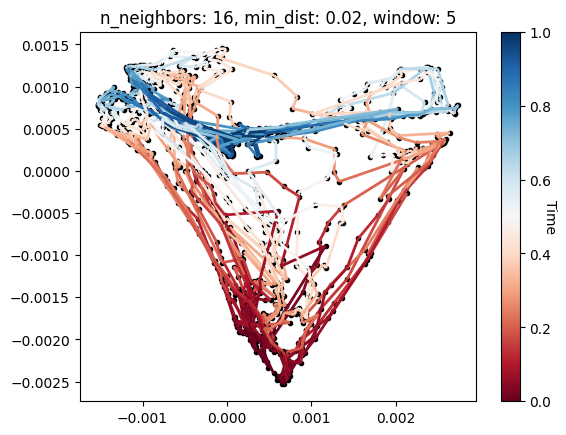

Embedding: 100%|██████████| 200/200 [00:00<00:00, 1162.12it/s]


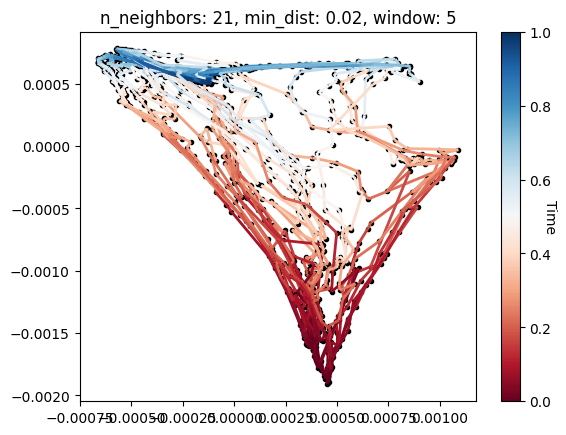

Embedding: 100%|██████████| 200/200 [00:00<00:00, 1269.36it/s]


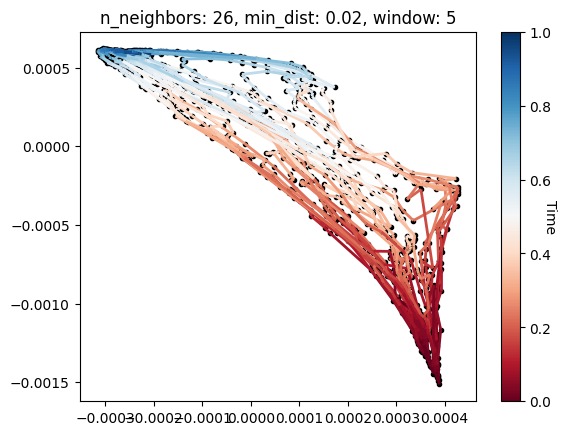

In [6]:
for p in np.arange(1, 31, 5):
    mapper = TemporalMAP(min_dist=0.02, n_neighbors=p, window=5)
    _ = mapper.fit(sequences[:30])
    plot_embeddings(mapper)